# Project: Investigating TMDb Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
#### Dataset description
- source of the dataset: [refer this doc](https://s3.amazonaws.com/video.udacity-data.com/topher/2018/July/5b57919a_data-set-options/data-set-options.pdf)
- The Dataset consists of 21 features with 10866 records
- Columns = ['id',
 'imdb_id',
 'popularity',
 'budget',
 'revenue',
 'original_title',
 'cast',
 'homepage',
 'director',
 'tagline',
 'keywords',
 'overview',
 'runtime',
 'genres',
 'production_companies',
 'release_date',
 'vote_count',
 'vote_average',
 'release_year',
 'budget_adj',
 'revenue_adj']
 
 ### Questions to answer

<ol>
    <li>Which genres are most popular from year to year?</li>
    <li>What kinds of properties are associated with movies that have high revenues?</li>
    <li>Did movies with higher vote count received a better rating?</li>
    <li>What were the most popular produced genres in 2000 compared to 2015?</li>
    <li>How did the amount of produced films changed over time?</li>
</ol>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

In [3]:
len(df.columns)

21

In [5]:
list(df.columns)

['id',
 'imdb_id',
 'popularity',
 'budget',
 'revenue',
 'original_title',
 'cast',
 'homepage',
 'director',
 'tagline',
 'keywords',
 'overview',
 'runtime',
 'genres',
 'production_companies',
 'release_date',
 'vote_count',
 'vote_average',
 'release_year',
 'budget_adj',
 'revenue_adj']

In [6]:
df.shape

(10866, 21)

In [7]:
# generating the information of with .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

**Observation:**
From the info return data, there exist null values in features *imdb_id, cast, homepage, director, tagline, keywords, overview,  genres, production_companies*

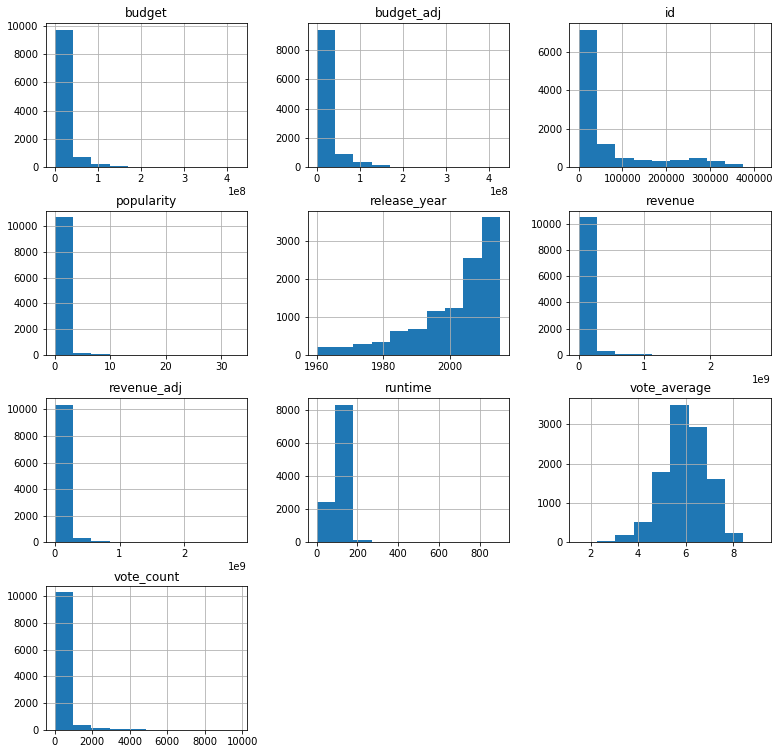

In [9]:
df.hist(figsize=(13,13));

In [10]:
df.describe()

id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.812941  3.430616e+07  1.446325e+08  
min       10.000000      1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%       17.000000      5.400000   1995.000000  0.000000e+00  0.000000e+00  
50%       38.000000      6.000000   2006.000000  0.000000e+00  0.000000e+00  
75%      145.750000      6.600000   2011.000000  2.085325e+07  3.369710e+07  
max     9767.000000      9.200000   2015.000000  4.250000e+08  2.827124e+09

There are plenty of columns indicating a problem. Many rows seems to contain several values, which are seperated by an "|". They need to be cleaned in the first place in order to provide a proper dataset for the intended analysis. The rows containing such values are:

<ul>
    <li>cast</li>
    <li>director</li>
    <li>keywords</li>
    <li>genres</li>
    <li>production_companies</li>
</ul>

Evenmore, there are columns in the dataset, which are not important to the intended analysis and therefore will be removed by the author. This includes:

<ul>
    <li>imdb_id</li>
    <li>homepage</li>
    <li>overview</li>
    <li>release_date</li>
    <li>tagline</li>
</ul>

## Data Cleaning 

In order to perfome a proper anaysis,
- lets replace 0s with Nan values
- Drop unwanted rows for easy and intutive anlysis
- Droping duplicate lines, correct data types

In [11]:
df['revenue_adj'].replace(0, np.NAN, inplace=True)
df['revenue'].replace(0, np.NAN, inplace=True)
df['budget_adj'].replace(0, np.NAN, inplace=True)
df['budget'].replace(0, np.NAN, inplace=True)
df['runtime'].replace(0, np.NAN, inplace=True)

df.dropna(axis=0, inplace=True)

In [15]:
df[df.isna() == True].shape

(1287, 21)

In [16]:
"""Seperating columns with several values, split by an '|', into as many columns as needed"""


df_c = (df['cast'].str.split('|', expand=True).rename(columns=lambda x: f"cast_{x+1}"))
df_d = (df['director'].str.split('|', expand=True).rename(columns=lambda x: f"director_{x+1}"))
df_k = (df['keywords'].str.split('|', expand=True).rename(columns=lambda x: f"keywords_{x+1}"))
df_g = (df['genres'].str.split('|', expand=True).rename(columns=lambda x: f"genres_{x+1}"))
df_p = (df['production_companies'].str.split('|', expand=True).rename(columns=lambda x: f"production_companies_{x+1}"))


In [17]:
df_c.head()

cast_1               cast_2            cast_3  \
0       Chris Pratt  Bryce Dallas Howard       Irrfan Khan   
1         Tom Hardy      Charlize Theron  Hugh Keays-Byrne   
2  Shailene Woodley           Theo James      Kate Winslet   
3     Harrison Ford          Mark Hamill     Carrie Fisher   
4        Vin Diesel          Paul Walker     Jason Statham   

               cast_4          cast_5  
0   Vincent D'Onofrio   Nick Robinson  
1      Nicholas Hoult     Josh Helman  
2        Ansel Elgort    Miles Teller  
3         Adam Driver    Daisy Ridley  
4  Michelle Rodriguez  Dwayne Johnson

In [18]:
# Joining the columns
df = df.join([df_c, df_d, df_k, df_g, df_p])
df = df.drop(['cast', 'keywords', 'director', 'genres', 'production_companies', 'imdb_id', 'homepage', 'overview', 'release_date', 'tagline'], axis=1)

In [20]:
df.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'runtime',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj', 'cast_1', 'cast_2', 'cast_3', 'cast_4', 'cast_5',
       'director_1', 'director_2', 'director_3', 'director_4', 'director_5',
       'director_6', 'keywords_1', 'keywords_2', 'keywords_3', 'keywords_4',
       'keywords_5', 'genres_1', 'genres_2', 'genres_3', 'genres_4',
       'genres_5', 'production_companies_1', 'production_companies_2',
       'production_companies_3', 'production_companies_4',
       'production_companies_5'],
      dtype='object')

**Obversation:** 
- droped unwanted columns ['cast', 'keywords', 'director', 'genres', 'production_companies', 'imdb_id', 'homepage', 'overview', 'release_date', 'tagline']
- Joined [df_c, df_d, df_k, df_g, df_p] into df

In [21]:
df.duplicated().sum()

0

**Observation:**There exist no duplicates in the data frame

In [22]:
df.dtypes

id                          int64
popularity                float64
budget                    float64
revenue                   float64
original_title             object
runtime                   float64
vote_count                  int64
vote_average              float64
release_year                int64
budget_adj                float64
revenue_adj               float64
cast_1                     object
cast_2                     object
cast_3                     object
cast_4                     object
cast_5                     object
director_1                 object
director_2                 object
director_3                 object
director_4                 object
director_5                 object
director_6                 object
keywords_1                 object
keywords_2                 object
keywords_3                 object
keywords_4                 object
keywords_5                 object
genres_1                   object
genres_2                   object
genres_3      

So far the data looks prepared for the analysis, no duplicates have been found, columns containing multiple values have been seperated and data types look ready for analysis. Next, the author will use masks (or queries) to  have a deeper look, if some double entries are in specific columns.

In [23]:
df['original_title'].value_counts().head()

Wanted                  2
The Three Musketeers    2
The Fog                 2
The Thing               2
Clash of the Titans     2
Name: original_title, dtype: int64

Since the value_counts() in the title column showed that there may be double entries of movie names, a function "check_double_title" was defined to have a deeper look in the rows with same movie title.

In [24]:
# Checking column for dubplicated original_title
limit_4_title = df['original_title'].value_counts().index.tolist()
limit_4_title = limit_4_title[:4]
limit_4_title

limit_4_id = df['original_title'].value_counts().index.tolist()

def check_double_title(names):
    for limit in limit_4_title:
        df_title = df[df['original_title'] == limit]
        print(df_title.iloc[:,:5])
        print("---------------------------------------------------------------------")
        
check_double_title(limit_4_title)

         id  popularity      budget      revenue original_title
1733  22717    0.278387        75.0        134.0         Wanted
2893   8909    1.982998  75000000.0  258270008.0         Wanted
---------------------------------------------------------------------
          id  popularity      budget      revenue        original_title
3425   52451    1.407986  75000000.0  132274484.0  The Three Musketeers
10251  10057    0.794564  30000000.0   53898845.0  The Three Musketeers
---------------------------------------------------------------------
       id  popularity      budget     revenue original_title
6312  791    0.608364  18000000.0  46201432.0        The Fog
7324  790    0.659182   1000000.0  21378361.0        The Fog
---------------------------------------------------------------------
         id  popularity      budget     revenue original_title
3472  60935    1.013771  35000000.0  28128670.0      The Thing
8890   1091    2.355353  10000000.0  13782838.0      The Thing
----------

In [25]:
df.shape

(1287, 37)

**Observation:** After all the operations the final cleaned dataset has 1287 records along with 37 features

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1: Which genres are most popular from year to year?

In [26]:
df_genres = df.loc[:, 'genres_1': 'genres_5' ]
df_genres_dates = df_genres.join(df['release_year'])

In [27]:
years = df_genres_dates['release_year'].unique() #creates an array of years mentioned in release year 
most_common = [] #creates a list of tuples for most common genres in specific years

#for loop to create most_common list
for year in years:
    #creates df filtered by every year mentioned in years
    a = df_genres_dates[df_genres_dates['release_year'] == year] 
    #drops columns "release_year to perferm stack value count in next line
    b = a.drop(['release_year'], axis = 1)
    #performs value count trough genres_1 - genres_5 and stores the index of maximum count
    c = b.stack().value_counts().idxmax() 

    #creates a masked DataFrame for respective years
    x = df[df['release_year'] == year]
    #creates the mean of vote_average and stores the index of maximum value
    y = x.groupby(['genres_1'])['vote_average'].mean().idxmax()
    if c == y:
        z = 'Equal'
    else:
        z = 'Not equal'
        #appends year with value count trough genres_1 - genres_5, the highest average vote_average and indicates if the resulting columns match
    most_common.append((year, c, y, z))

#creates df for list of tuples named most_common
df_most_popular = pd.DataFrame(most_common, columns=['release_year', 'popular_produced_genre', 'popular_voted_gerne', 'is_equal']).sort_values('release_year').reset_index().drop(['index'], axis=1)
df_most_popular

release_year popular_produced_genre popular_voted_gerne   is_equal
0           1961                 Family              Comedy  Not equal
1           1962               Thriller           Adventure  Not equal
2           1963              Adventure              Action  Not equal
3           1964                 Comedy           Adventure  Not equal
4           1965               Thriller           Adventure  Not equal
5           1967              Adventure              Action  Not equal
6           1969               Thriller           Adventure  Not equal
7           1971               Thriller              Action  Not equal
8           1972                  Drama               Drama      Equal
9           1973               Thriller               Drama  Not equal
10          1974               Thriller           Adventure  Not equal
11          1975                 Horror           Adventure  Not equal
12          1977                 Action           Adventure  Not equal
13          1978                 Horror              Horror      Equal
14          1979        Science Fiction               Drama  Not equal
15          1980                 Horror           Adventure  Not equal
16          1981              Adventure           Adventure      Equal
17          1982        Science Fiction              Horror  Not equal
18          1983                 Action            Thriller  Not equal
19          1984                 Action             Fantasy  Not equal
20          1985              Adventure           Adventure      Equal
21          1986                 Comedy           Adventure  Not equal
22          1987                  Drama               Drama      Equal
23          1988                 Horror              Action  Not equal
24          1989              Adventure           Adventure      Equal
25          1990                 Action              Comedy  Not equal
26          1991                 Family             Romance  Not equal
27          1992                  Drama           Animation  Not equal
28          1993                  Drama           Adventure  Not equal
29          1994                  Drama              Family  Not equal
30          1995               Thriller           Animation  Not equal
31          1996                  Drama               Crime  Not equal
32          1997                  Drama               Drama      Equal
33          1998                 Comedy               Drama  Not equal
34          1999                  Drama             Fantasy  Not equal
35          2000               Thriller             Mystery  Not equal
36          2001                 Comedy             Fantasy  Not equal
37          2002                 Action         Documentary  Not equal
38          2003               Thriller           Animation  Not equal
39          2004                  Drama             Romance  Not equal
40          2005                  Drama             Romance  Not equal
41          2006                  Drama               Crime  Not equal
42          2007                  Drama           Adventure  Not equal
43          2008                  Drama                 War  Not equal
44          2009                  Drama         Documentary  Not equal
45          2010                  Drama         Documentary  Not equal
46          2011                  Drama         Documentary  Not equal
47          2012                 Comedy              Family  Not equal
48          2013                 Action             Romance  Not equal
49          2014                  Drama             History  Not equal
50          2015                  Drama             Western  Not equal

In [28]:
df_most_popular['is_equal'].value_counts()

Not equal    44
Equal         7
Name: is_equal, dtype: int64

In [30]:
df_most_popular['popular_produced_genre'].value_counts()

Drama              18
Thriller            9
Action              6
Comedy              5
Adventure           5
Horror              4
Family              2
Science Fiction     2
Name: popular_produced_genre, dtype: int64

**Observation:** Drama genre is highist among the rest here.

In [31]:
df_most_popular['popular_voted_gerne'].value_counts()

Adventure      14
Drama           6
Romance         4
Documentary     4
Action          4
Fantasy         3
Animation       3
Comedy          2
Horror          2
Family          2
Crime           2
Thriller        1
War             1
Western         1
Mystery         1
History         1
Name: popular_voted_gerne, dtype: int64

**Observation:** Adventure is leading among the rest.

### Research Question 2:  What kinds of properties are associated with movies that have high revenues?

In [32]:
df_revenue = df

In [34]:
df_revenue.head()

id  popularity       budget       revenue  \
0  135397   32.985763  150000000.0  1.513529e+09   
1   76341   28.419936  150000000.0  3.784364e+08   
2  262500   13.112507  110000000.0  2.952382e+08   
3  140607   11.173104  200000000.0  2.068178e+09   
4  168259    9.335014  190000000.0  1.506249e+09   

                 original_title  runtime  vote_count  vote_average  \
0                Jurassic World    124.0        5562           6.5   
1            Mad Max: Fury Road    120.0        6185           7.1   
2                     Insurgent    119.0        2480           6.3   
3  Star Wars: The Force Awakens    136.0        5292           7.5   
4                     Furious 7    137.0        2947           7.3   

   release_year    budget_adj  ...   genres_1         genres_2  \
0          2015  1.379999e+08  ...     Action        Adventure   
1          2015  1.379999e+08  ...     Action        Adventure   
2          2015  1.012000e+08  ...  Adventure  Science Fiction   
3          2015  1.839999e+08  ...     Action        Adventure   
4          2015  1.747999e+08  ...     Action            Crime   

          genres_3  genres_4 genres_5     production_companies_1  \
0  Science Fiction  Thriller     None          Universal Studios   
1  Science Fiction  Thriller     None  Village Roadshow Pictures   
2         Thriller      None     None       Summit Entertainment   
3  Science Fiction   Fantasy     None                  Lucasfilm   
4         Thriller      None     None         Universal Pictures   

       production_companies_2   production_companies_3  \
0        Amblin Entertainment       Legendary Pictures   
1  Kennedy Miller Productions                     None   
2            Mandeville Films  Red Wagon Entertainment   
3       Truenorth Productions                Bad Robot   
4               Original Film     Media Rights Capital   

    production_companies_4 production_companies_5  
0  Fuji Television Network                 Dentsu  
1                     None                   None  
2                  NeoReel                   None  
3                     None                   None  
4                   Dentsu         One Race Films  

[5 rows x 37 columns]

In [36]:
#Performing basic statistic in order to create 4 classifications of the revenue_adj

df_revenue['revenue_adj'].describe()

count    1.287000e+03
mean     1.991775e+08
std      2.968515e+08
min      4.300000e+01
25%      2.764890e+07
50%      8.674770e+07
75%      2.351178e+08
max      2.827124e+09
Name: revenue_adj, dtype: float64

In [37]:
#Bin_edges correspond to min - max entries in previous cell. Quantiles are lables by bin_names.
#new column 'revenue_level' is created to classify columns based on revenues

bin_edges = [2.37,10465848.09,43956661.16,131648235.91,2827123750.41]
bin_names = ['very low' ,'low' ,'medium' ,'high' ] 
df_revenue['revenue_level'] = pd.cut(df_revenue['revenue_adj'], bin_edges, labels=bin_names)

In [38]:
#list of revenue_levels classification is created for loop in next cell
df_revenue['revenue_level'].unique()
revenue_levels = df_revenue['revenue_level'].unique().tolist()
del revenue_levels[-1]

In [39]:
#nested dictionary is created with 8 attributes based on revenue_levels

movie_data = {}

for level in revenue_levels:
    
    #stack.value_counts seciton
    grouped_data = df_revenue[df_revenue['revenue_level'] == level]
        #director
    director = grouped_data.loc[:, 'director_1': 'director_6']
    frequent_director = director.stack().value_counts().idxmax()
        #cast
    cast = grouped_data.loc[:, 'cast_1': 'cast_5']
    frequent_cast = cast.stack().value_counts().idxmax()
        #genres
    genres = grouped_data.loc[:, 'genres_1': 'genres_5']
    frequent_genres = genres.stack().value_counts().idxmax()
        #production companies
    production = grouped_data.loc[:, 'production_companies_1': 'production_companies_5']
    frequent_production = production.stack().value_counts().idxmax()
        #release_year
    release_year = grouped_data['release_year'].value_counts().idxmax()
    
    #average section
    avg_duration = grouped_data['runtime'].mean()
    avg_budget = grouped_data['budget_adj'].mean()
    avg_vote = grouped_data['vote_average'].mean()
    
    #creating nested dictionary
    movie_data[level] = {'avg_duration' : avg_duration, 
                         'frequent_director' : frequent_director, 
                         'avg_budget' : avg_budget, 
                         'avg_vote' : avg_vote,
                        'frequent_cast' : frequent_cast,
                        'frequent_genres' : frequent_genres,
                        'release_year' : release_year,
                        'frequent_production_companies' : frequent_production}

In [40]:
movie_classes = []
frames = []

for movie_class, d in movie_data.items():
    movie_classes.append(movie_class)
    frames.append(pd.DataFrame.from_dict(d, orient='index'))
    
properties = pd.concat(frames, keys=movie_classes)  

properties.columns = ['values']
properties

values
high     avg_duration                              117.541
         frequent_director                Steven Spielberg
         avg_budget                            9.54429e+07
         avg_vote                                   6.5187
         frequent_cast                          Matt Damon
         frequent_genres                            Action
         release_year                                 2011
         frequent_production_companies  Universal Pictures
low      avg_duration                              105.008
         frequent_director                  John Carpenter
         avg_budget                            2.51297e+07
         avg_vote                                  6.16988
         frequent_cast                       Colin Farrell
         frequent_genres                             Drama
         release_year                                 2011
         frequent_production_companies  Universal Pictures
medium   avg_duration                              107.826
         frequent_director                  John Carpenter
         avg_budget                             3.9913e+07
         avg_vote                                  6.16727
         frequent_cast                       Jason Bateman
         frequent_genres                             Drama
         release_year                                 2011
         frequent_production_companies        Warner Bros.
very low avg_duration                               102.02
         frequent_director                  Barry Levinson
         avg_budget                            1.03802e+07
         avg_vote                                   5.9852
         frequent_cast                          Ellen Page
         frequent_genres                             Drama
         release_year                                 2010
         frequent_production_companies           Lionsgate

In [41]:
df_revenue.corr()

id  popularity    budget   revenue   runtime  vote_count  \
id            1.000000    0.189301 -0.050921 -0.031441 -0.013123    0.059368   
popularity    0.189301    1.000000  0.432791  0.594755  0.322390    0.744088   
budget       -0.050921    0.432791  1.000000  0.706888  0.337373    0.583038   
revenue      -0.031441    0.594755  0.706888  1.000000  0.371226    0.775374   
runtime      -0.013123    0.322390  0.337373  0.371226  1.000000    0.426505   
vote_count    0.059368    0.744088  0.583038  0.775374  0.426505    1.000000   
vote_average  0.004985    0.355904  0.075168  0.296501  0.385210    0.464812   
release_year  0.494397    0.059243  0.179160  0.028022 -0.071863    0.071290   
budget_adj   -0.116021    0.419863  0.985112  0.713706  0.361985    0.572798   
revenue_adj  -0.102211    0.549299  0.566835  0.913802  0.371980    0.703183   

              vote_average  release_year  budget_adj  revenue_adj  
id                0.004985      0.494397   -0.116021    -0.102211  
popularity        0.355904      0.059243    0.419863     0.549299  
budget            0.075168      0.179160    0.985112     0.566835  
revenue           0.296501      0.028022    0.713706     0.913802  
runtime           0.385210     -0.071863    0.361985     0.371980  
vote_count        0.464812      0.071290    0.572798     0.703183  
vote_average      1.000000     -0.163737    0.088272     0.322503  
release_year     -0.163737      1.000000    0.056174    -0.228469  
budget_adj        0.088272      0.056174    1.000000     0.613093  
revenue_adj       0.322503     -0.228469    0.613093     1.000000

### Research Question 3:  Did movies with higher vote count received a better rating?

In [42]:
#Slice DataFrame to get 2 columns 'vote_count' and 'vote_average'
df_vote = df.loc[:, 'vote_count' : 'vote_average']
#To compare results only entries are considered with more than 2000 votes
df_vote_2000 = df_vote[df_vote['vote_count'] > 2000]

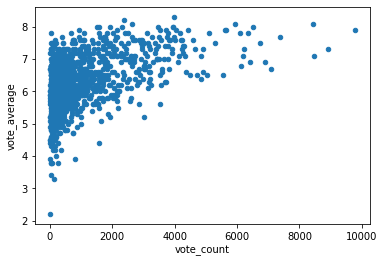

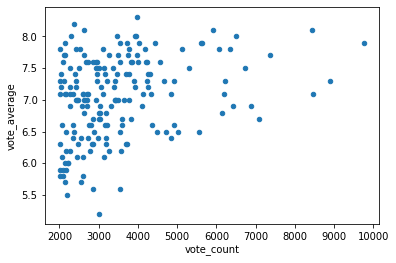

In [43]:
df_vote.plot(x='vote_count', y='vote_average', kind='scatter');
df_vote_2000.plot(x='vote_count', y='vote_average', kind='scatter');

In [44]:
df_vote.corr()

vote_count  vote_average
vote_count      1.000000      0.464812
vote_average    0.464812      1.000000

In [45]:
 df_vote_2000.corr()

vote_count  vote_average
vote_count      1.000000      0.305343
vote_average    0.305343      1.000000

### Research Question 4:  What were the most popular produced genres in 2000 compared to 2015?

In [48]:
#Creating a Mask for the release_year 2015
df_2015 = df_genres_dates[df_genres_dates['release_year'] == 2015].copy()
#drop release_year
df_2015.drop('release_year',axis=1, inplace=True)
#value_counts across columns
df_2015 = df_2015.stack().value_counts()

In [49]:
#Creating a Mask for the release_year 2000
df_2000 = df_genres_dates[df_genres_dates['release_year'] == 2000].copy()
#drop release_year
df_2000.drop('release_year',axis=1, inplace=True)
#value_counts across columns
df_2000 = df_2000.stack().value_counts()

In [50]:
#Comparing index of both dataframes
df_2015.index.sort_values(),df_2000.index.sort_values()

#Adjusting columns to have a match in columns
df_2000['Animation'] = 0
df_2000['Crime'] = 0
df_2000['History'] = 0
df_2000['Horror'] = 0
df_2000['Music'] = 0
df_2000['Western'] = 0

#Updating DataFrames, sort it by index
df_2015 = df_2015.sort_index()
df_2000 = df_2000.sort_index()

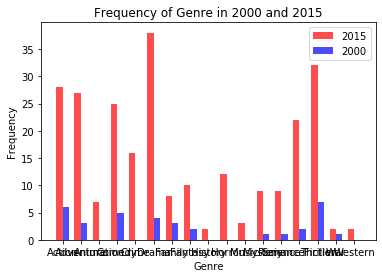

In [51]:
'''Creating a plot with a bar chart with 2 bars'''
labels = df_2000.index.sort_values()
ind = np.arange(len(df_2015))  # the x locations for the groups
width = 0.35       # the width of the bars

# plot bars
red_bars = plt.bar(ind, df_2015, width, color='r', alpha=.7, label='2015')
white_bars = plt.bar(ind + width, df_2000, width, color='b', alpha=.7, label='2000')

# title and labels
plt.ylabel('Frequency')
plt.xlabel('Genre')
plt.title('Frequency of Genre in 2000 and 2015')
locations = ind + width / 2  # xtick locations
labels = labels # xtick labels
plt.xticks(locations, labels)
plt.rcParams["figure.figsize"] = (20,10)
# legend
plt.legend();

### Research Question 5:  How did the amount of produced films changed over time?


In [52]:
amount_of_movies = [] #creates a list of tuples for amount of movies

#for loop to create amount_of_movies, years was previously defined
for year in years:
    d = df_genres_dates[df_genres_dates['release_year'] == year] #creates df filtered by every year mentioned in years
    e = len(d.index) #determines the number of rows 
    amount_of_movies.append((year, e)) #appends year with respective number of rows
    
#creates df for list of tuples amount_of_movies
df_amount_of_movies = pd.DataFrame(amount_of_movies, columns=['release_year', 'amount_of_mvies']).sort_values('release_year').reset_index().drop(['index'], axis=1)

release_year  amount_of_mvies
0           1961                1
1           1962                1
2           1963                1
3           1964                2
4           1965                1
5           1967                1
6           1969                1
7           1971                4
8           1972                1
9           1973                2
10          1974                1
11          1975                3
12          1977                2
13          1978                2
14          1979                4
15          1980                2
16          1981                6
17          1982                3
18          1983                5
19          1984                4
20          1985                2
21          1986                1
22          1987                4
23          1988                2
24          1989                4
25          1990                4
26          1991                2
27          1992                5
28          1993                7
29          1994                5
30          1995                8
31          1996               13
32          1997                8
33          1998               11
34          1999               22
35          2000               14
36          2001               18
37          2002               24
38          2003               30
39          2004               43
40          2005               51
41          2006               68
42          2007               92
43          2008               82
44          2009              116
45          2010              132
46          2011              156
47          2012               88
48          2013               65
49          2014               70
50          2015               93

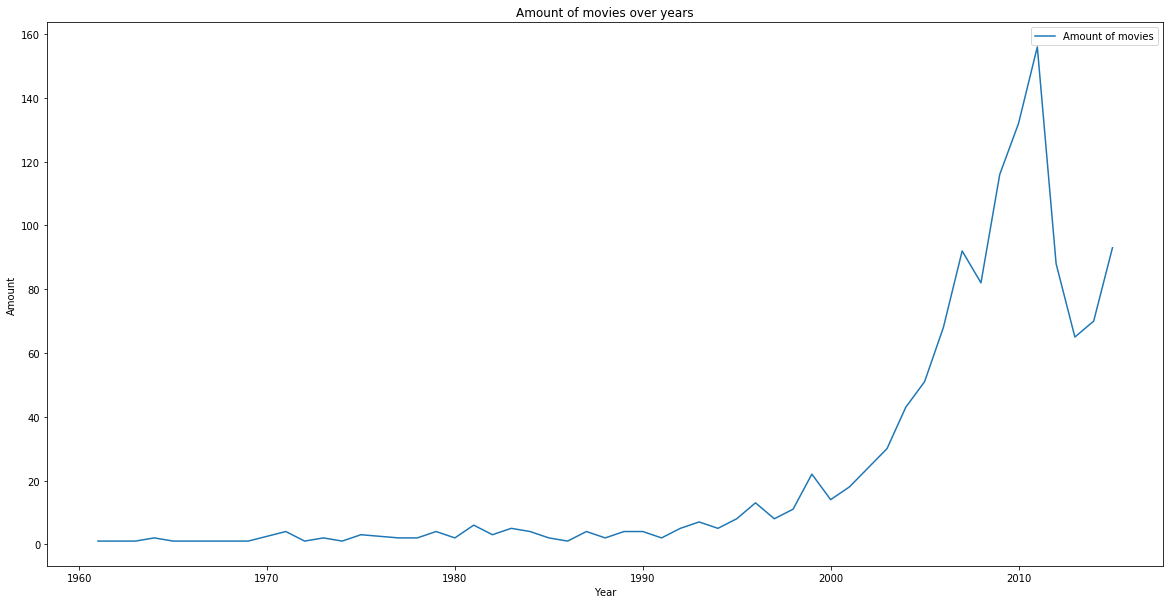

In [53]:
df_amount_of_movies.plot(x='release_year', y='amount_of_mvies', kind='line', figsize=(20,10), title="Amount of movies over years", label="Amount of movies", )
plt.xlabel('Year')
plt.ylabel('Amount');
df_amount_of_movies

<a id='conclusions'></a>
## Conclusions

**Q1** "Which genres are most popular from year to year?" <br>

As shown surprising results, as the most popular genre differed a lot. To the authors surprise, only in 11 occasions best genre by the users was also voted asthe most frequent produced genres. In all remaining 40 occasions the two values differed.

**Q2** "What kinds of properties are associated with movies that have high revenues?" <br>

shows interesting result. The numeric columns of "popularity, budget and vote_count" show the highest correlations. One can argue that movies with higher budgets are able to receive higher revenues, nevertheless, the correlation is not on a very high level. Vote_count is indicating that the more people vote for a movie, the higher the revenue is. Most probably, this is not a good indicator for high revenue movies. High revenue movies indicate that they are most commonly directed by Matt Damon, cast Tom Cruise as actor and contain the genre Action.

**Q3** "Did movies with higher vote count received a better rating?" <br>

does not indicate that movies with a higher vote_count receive a higher vote_average. Also by considering columns with more than 2000 vote_count does not change the impression. Furthermore, the corralation does not indicate that higher vote counts result in higher vote averages.

**Q4** "What were the most popular produced genres in 2000 compared to 2015?" <br>

indicate that in the year 2015 dramas were by far the most frequent produced movies, followed by thrillers and action. In 2000 the most frequent produced genre was thriller, followed by action and comedies. The bar chart indicates that in 2015 much more movies were produced compared to the year 2000. 
 
**Q5** "How did the amount of produced films changed over time?" <br>

reveals that the amount of produced films significantly increased from 1960 to 2015. Up to 1983 not more than 100 movies were prodcued per year, while in 2014 700 movies were produced. A strong increase in movie production can be obsorved between 1997-2009. One has to consider that the line chart does not show accurate results, as many rows from the original dataset were dropped.